Problem Statement:

The profiles contain information about the customer, their orders, their transactions, what payment methods they used and whether the customer is fraudulent or not.

1) Tasks

Provide exploratory analysis of the dataset.
Summarise and explain the key trends in the data, providing visualisations and tabular representations as necessary.
Explain what factors you think are significant and insignificant in contributing to fraud
Construct a model to predict if a customer is fraudulent based on their profile.
Report on the models success and show what features are most important

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
import joblib

In [ ]:
df1 = pd.read_csv('/content/Customer_DF (1).csv')
df2 = pd.read_csv('/content/cust_transaction_details (1).csv')

**Step 1: Data Understanding and Exploration**

In [ ]:
df1.head(5)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [ ]:
df2.head(5)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
print(df1.shape)
print(df2.shape)

(168, 10)
(623, 11)


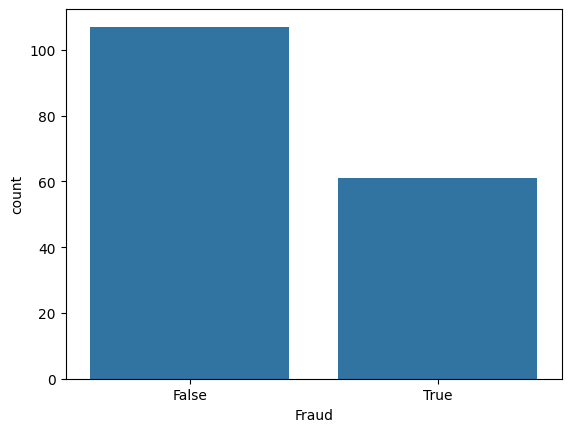

False    107
True      61
Name: Fraud, dtype: int64


In [ ]:
# Visualize the target variable distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Fraud', data=df1)
plt.show()

print(df1['Fraud'].value_counts())

In [ ]:
# checking target feature with histogram as counplot

px.histogram(df1, x='Fraud')

In [ ]:
# Drop unnecessary columns
df1 = df1.drop('Unnamed: 0', axis=1)
df2 = df2.drop('Unnamed: 0', axis=1)

In [ ]:
# Print column names for df1
print("Columns in df1:", df1.columns)

# Print column names for df2
print("Columns in df2:", df2.columns)


Columns in df1: Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud'],
      dtype='object')
Columns in df2: Index(['customerEmail', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState'],
      dtype='object')


# **Step 2: Data Merging **

In [ ]:
# Merging datasets based on 'customerEmail'
#dataset = pd.merge(df1, df2, on='customerEmail', how='outer')

dataset = pd.merge(df1, df2, on='customerEmail', how='inner')

#checking how datalook like

In [ ]:
# checking how datalook like
dataset.sample(10)

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
173,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True,w5wkltds,3ougge,opyep1aoj,0,card,VISA 16 digit,11,0,fulfilled
590,tmcpherson@wright.com,1-804-264-1481x08539,ui77ukzr5lnqpajdk03u,296d:59fe:a919:21ac:16dd:96f5:10b3:4f83,"7956 Alex Avenue Apt. 593\nPort Michael, OK 41350",13,8,1,True,nob1c9da,loejqo,w8f4lcsen,1,card,VISA 13 digit,33,0,pending
155,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True,gzs6it77,b8mpa4,hs3hemcz6,0,card,Maestro,22,1,fulfilled
736,brittany60@yahoo.com,(172)959-5151,55uutypnlt0dve5gnzpx,174.86.116.243,"603 Sophia Flat Suite 158\nSouth Wandaland, PR...",5,4,2,False,dl1cdscx,wbvdcq,qp0jwedbw,0,card,VISA 13 digit,34,0,failed
479,bakersydney@gmail.com,002.940.3004x9094,18cnggmlahgf7trpqsu8,246.139.218.89,"8649 Mcgee Locks Apt. 114\nNorth Angelafort, I...",5,3,1,False,x8085ani,87w5rm,74rqcnogo,0,card,Voyager,34,0,fulfilled
473,mgould@yahoo.com,1-394-145-7899x0176,o7xocau2odnpc1so7ued,e85d:101b:e213:d8d0:8722:3fce:1e31:17f3,"19170 Hansen Throughway\nWilkersonville, PA 09423",5,4,2,False,vvo1vly6,umxpkn,x6zmw4nns,1,card,Diners Club / Carte Blanche,21,0,fulfilled
240,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,soaefwfo,pc6hb6,8wpdnmsut,0,paypal,JCB 16 digit,46,0,fulfilled
97,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True,t2tr0zve,1c0bds,hs3hemcz6,0,card,Maestro,47,0,fulfilled
699,lsanchez@hotmail.com,00256720158,o9cdi8b4zhrzzvp0hl2f,49.219.239.140,"044 Ronnie Run\nSouth Dawn, CA 49202-3034",5,4,2,False,3q7pfnul,v91d47,8iizua67d,0,card,Maestro,23,0,fulfilled
663,brianthomas@yahoo.com,04061905118,1djsf7mffce2xhvsf139,219.222.4.152,9205 Jeremiah Field Suite 815\nEast Christophe...,6,4,1,False,srhoioko,81wxhb,9i0e5d5ex,0,card,JCB 16 digit,46,0,fulfilled


In [ ]:
#checking shape of dataset after merging
dataset.shape

(819, 18)

In [ ]:
dataset.isnull().sum()

customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

#checking target feature disturbtion after merging datset

In [ ]:
#checking target
dataset['Fraud'].value_counts()

True     453
False    366
Name: Fraud, dtype: int64

In [ ]:
px.histogram(dataset, x ='Fraud')

observation :
false : 366 , true : 453

In [ ]:
# checking length for 'Fraud' is the target feature

total_rows = len(dataset['Fraud'])

print(f'Total rows in the target feature: {total_rows}')

Total rows in the target feature: 819


In [ ]:
# checking catogeries in fraud
dataset['Fraud'].nunique()

2

# checking duplicate column in dataset

In [ ]:
print(' checking duplicated column from dataset:')
print(dataset.duplicated().sum())



 checking duplicated column from dataset:
0


# checking null value present in dataset

In [ ]:
dataset.isnull().sum()

customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

# checking shape of data

In [ ]:
dataset.shape

(819, 18)

#checking stats for min, std, max, mean for numerical columns

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
No_Transactions,819.0,5.195360,2.924214,0.0,3.0,5.0,7.0,15.0
No_Orders,819.0,3.808303,1.866872,0.0,3.0,4.0,5.0,8.0
No_Payments,819.0,2.135531,1.860001,0.0,1.0,2.0,3.0,15.0
paymentMethodRegistrationFailure,819.0,0.100122,0.300346,0.0,0.0,0.0,0.0,1.0
transactionAmount,819.0,35.147741,19.640072,10.0,22.0,34.0,46.0,353.0
transactionFailed,819.0,0.256410,0.436918,0.0,0.0,0.0,1.0,1.0


#cehcking information about columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     819 non-null    object
 1   customerPhone                     819 non-null    object
 2   customerDevice                    819 non-null    object
 3   customerIPAddress                 819 non-null    object
 4   customerBillingAddress            819 non-null    object
 5   No_Transactions                   819 non-null    int64 
 6   No_Orders                         819 non-null    int64 
 7   No_Payments                       819 non-null    int64 
 8   Fraud                             819 non-null    bool  
 9   transactionId                     819 non-null    object
 10  orderId                           819 non-null    object
 11  paymentMethodId                   819 non-null    object
 12  paymentMethodRegistrat

seprateing dataset in x and y for further analysis

In [ ]:
dataset_X = dataset.drop('Fraud', axis=1)
dataset_y = dataset['Fraud']

In [ ]:
# checking shape of y
dataset_y.shape

(819,)

# spliting data in numerical columns and catogerical columns for further analysis

In [ ]:
# Assuming df is your DataFrame

numerical_columns = dataset_X.select_dtypes(include=['int64']).columns
categorical_columns = dataset_X.select_dtypes(include=['object', 'bool']).columns

# Separate numerical and categorical columns
numerical_df = dataset_X[numerical_columns]
categorical_df = dataset_X[categorical_columns]


checking numerical column

In [ ]:
numerical_df

,No_Transactions,No_Orders,No_Payments,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
0,2,2,1,1,18,0
1,2,2,1,1,26,0
2,3,3,7,0,45,0
3,3,3,7,0,23,0
4,3,3,7,1,43,1
...,...,...,...,...,...,...
814,7,5,4,0,25,1
815,7,5,4,0,25,0
816,7,5,4,0,25,1
817,7,5,4,0,19,0


In [ ]:
numerical_df.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed'],
      dtype='object')

#checking categorical columns

In [ ]:
categorical_df.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodType', 'paymentMethodProvider', 'orderState'],
      dtype='object')

In [ ]:
categorical_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,transactionId,orderId,paymentMethodId,paymentMethodType,paymentMethodProvider,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,vjbdvd,wt07xm68b,card,JCB 16 digit,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,yp6x27,wt07xm68b,card,JCB 16 digit,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5mi94sfw,nlghpa,41ug157xz,bitcoin,American Express,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,uw0eeb,41ug157xz,bitcoin,American Express,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,a33145ss,bn44oh,y3xp697jx,bitcoin,VISA 16 digit,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7yilsi1o,1bubxa,7yen1m1q8,card,VISA 13 digit,fulfilled
815,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",c82k5bcv,1bubxa,7yen1m1q8,card,VISA 13 digit,fulfilled
816,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",wmh52bns,1bubxa,3zmkegkb8,paypal,JCB 15 digit,fulfilled
817,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",xdw33hfp,p0gdbf,3zmkegkb8,paypal,JCB 15 digit,fulfilled


#Univariate Analysis (Numerical Features) - Dataset :

In [ ]:
import plotly.express as px

#with plotly express
# Numerical features in dataset
numerical_df

# Univariate analysis (Numerical features) - Dataset 1
for column in numerical_df.columns:
    fig = px.histogram(numerical_df, x=column, hover_data=numerical_df.columns)
    fig.update_layout(title=f'Univariate Analysis - {column}')
    fig.show()

###########################################################################################

#Univariate Analysis (Categorical Features) - Dataset :

In [ ]:
import plotly.express as px

# Categorical features in dataset
categorical_df

# Assuming 'Fraud' is the target variable
dataset_y

# Univariate analysis (Categorical features)
for column in categorical_df.columns:
    fig = px.bar(dataset_X, x=column, color=dataset_y, title=f'Univariate Analysis - {column}', barmode='group')
    fig.show()


observation:
1.card has most fraud tranction in paymentmethod
2. paypal and apple pay has less fraud tranction in paymentmethod
3. jcb 16 digit has most fraud tranction as paymentMethodProvider
4. mastercard has less fraud tranction as paymentMethodProvider

obseravtion : for customer email that are from fraudser
gonzlesjackson@gmail.com

In [ ]:
import plotly.express as px

# Categorical features in dataset
categorical_df

# Assuming 'Fraud' is the target variable
dataset_y

# Univariate analysis (Categorical features)
for column in categorical_df.columns:
    fig = px.bar(categorical_df, x=column, color=dataset_y, title=f'Univariate Analysis - {column}', barmode='group')
    fig.show()

###########################################################################


In [ ]:
dataset_X.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


#############################################################################

#Which Payment Methods that the most use??

In [ ]:
import plotly.express as px

# Assuming 'paymentMethodType' is the column representing payment methods in dataset_X
payment_method_analysis = dataset_X['paymentMethodType'].value_counts().reset_index()

# Plotting the bar chart
fig = px.bar(data_frame=payment_method_analysis, x='index', y='paymentMethodType',
             title='Analysis of Payment Methods',
             labels={'index': 'Payment Method', 'paymentMethodType': 'Count'},
             color='paymentMethodType')

fig.show()


observation:

1. Payment Method that the most use is card
2. For other payment methods are relatively the same in use

another code for above question



In [ ]:
import plotly.express as px

# Assuming 'paymentMethodType' is a column in your DataFrame (dataset)

# Count occurrences of each payment method
payment_method_counts = dataset_X['paymentMethodType'].value_counts().reset_index()

# Create a bar plot
fig = px.bar(payment_method_counts,
             x='index',
             y='paymentMethodType',
             title='Count of Payment Methods')

# Update axis labels for better readability
fig.update_layout(xaxis_title='Payment Method Type', yaxis_title='Count')

# Show the plot
fig.show()


observation:

1. Payment Method that the most use is card
2. For other payment methods are relatively the same in use

##########################################################################

#which payment status appears most often??

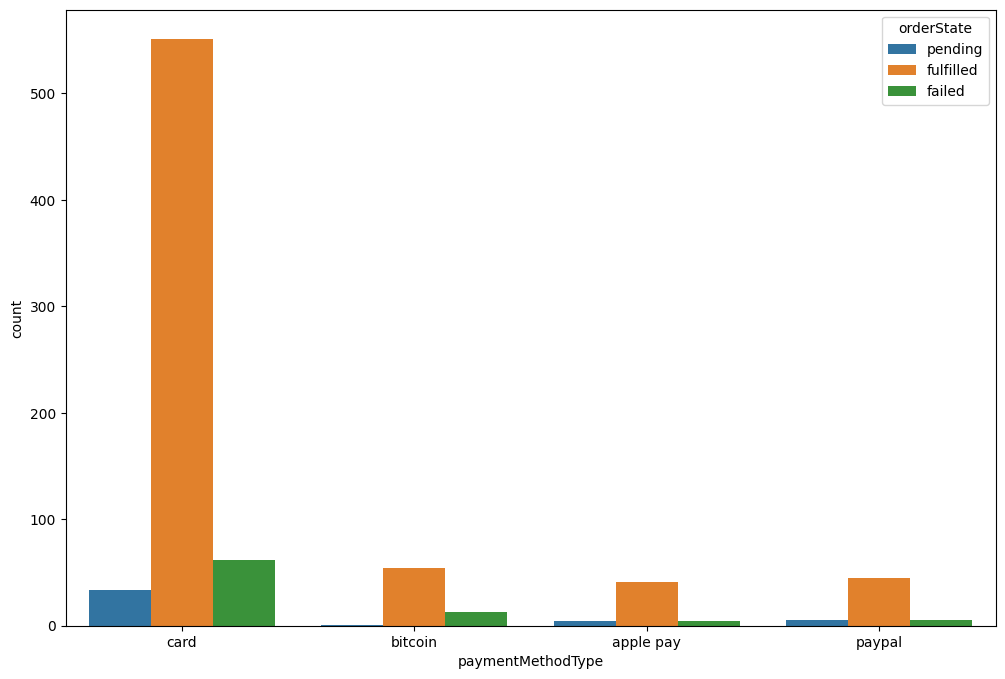

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'paymentMethodType' and 'orderState' are columns in your DataFrame (dataset)
plt.figure(figsize=(12, 8))

# Create a count plot with hue
ax = sns.countplot(x='paymentMethodType', hue='orderState', data=dataset_X)


In [ ]:
import plotly.express as px

# Assuming 'paymentMethodType' and 'orderState' are columns in your DataFrame (dataset)
fig = px.histogram(dataset_X, x='paymentMethodType', color='orderState',
             title='Count of Payment Methods by Order State')

# Show the plot
fig.show()


######################################################################################################

#Total number of payments per Fraud Transactions?

In [ ]:
import plotly.express as px

# Assuming 'No_Payments' is a column in your DataFrame (dataset_X) and 'fraud' is in dataset_y
fig = px.histogram(dataset_X, x='No_Payments', color=dataset_y,
             title='Total Number of Payments per Fraud Transactions')

# Show the plot
fig.show()


observation:

number of payment more than 4 is Fraud

############################################################################

## #Bivariate Analysis (Numerical Features with Target) - Dataset:

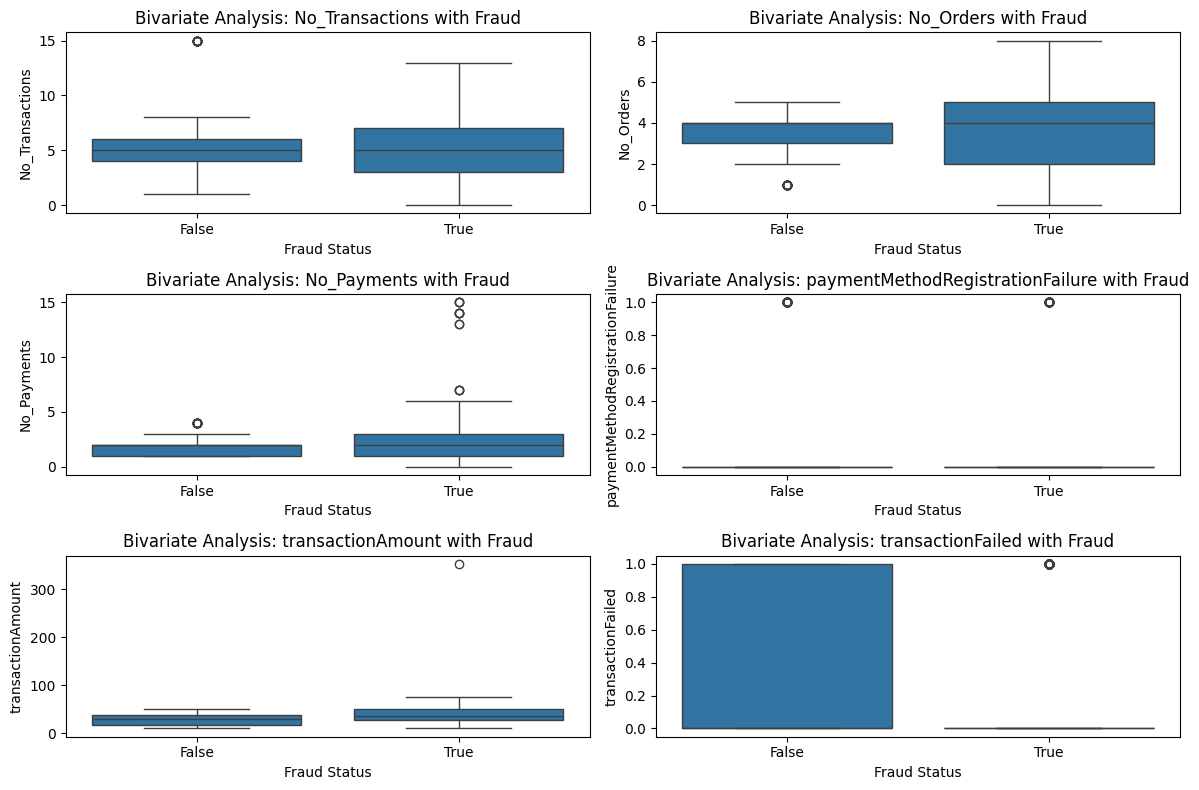

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Assuming you have a DataFrame 'numerical_df' with the specified numerical columns


for i, column in enumerate(numerical_df, 1):
    plt.subplot(3, 2, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=dataset_y, y=column, data=numerical_df)
    plt.xlabel("Fraud Status")
    plt.ylabel(column)
    plt.title(f'Bivariate Analysis: {column} with Fraud')

plt.tight_layout()
plt.show()


observation:
1. no transcation has having some outliers
2. no order is also having outliers
3. no payment is having outliers in it

In [ ]:
import plotly.express as px

#  numerical features
numerical_df

# Bivariate analysis (Numerical features with target - Box Plots)
for column in numerical_df:
    fig = px.box(numerical_df, x=dataset_y, y=numerical_df[column],
                 title=f'Bivariate Analysis - {column} with Fraud',
                 labels={'fraud_combined': 'Fraud', 'value': column})

    # Show the plot
    fig.show()

#############################################################################

#Bivariate Analysis (Categorical Features with Target) - Dataset 1:

In [ ]:
categorical_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,transactionId,orderId,paymentMethodId,paymentMethodType,paymentMethodProvider,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,vjbdvd,wt07xm68b,card,JCB 16 digit,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,yp6x27,wt07xm68b,card,JCB 16 digit,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5mi94sfw,nlghpa,41ug157xz,bitcoin,American Express,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,uw0eeb,41ug157xz,bitcoin,American Express,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,a33145ss,bn44oh,y3xp697jx,bitcoin,VISA 16 digit,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7yilsi1o,1bubxa,7yen1m1q8,card,VISA 13 digit,fulfilled
815,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",c82k5bcv,1bubxa,7yen1m1q8,card,VISA 13 digit,fulfilled
816,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",wmh52bns,1bubxa,3zmkegkb8,paypal,JCB 15 digit,fulfilled
817,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",xdw33hfp,p0gdbf,3zmkegkb8,paypal,JCB 15 digit,fulfilled


In [ ]:
categorical_df.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodType', 'paymentMethodProvider', 'orderState'],
      dtype='object')

###########################################################################

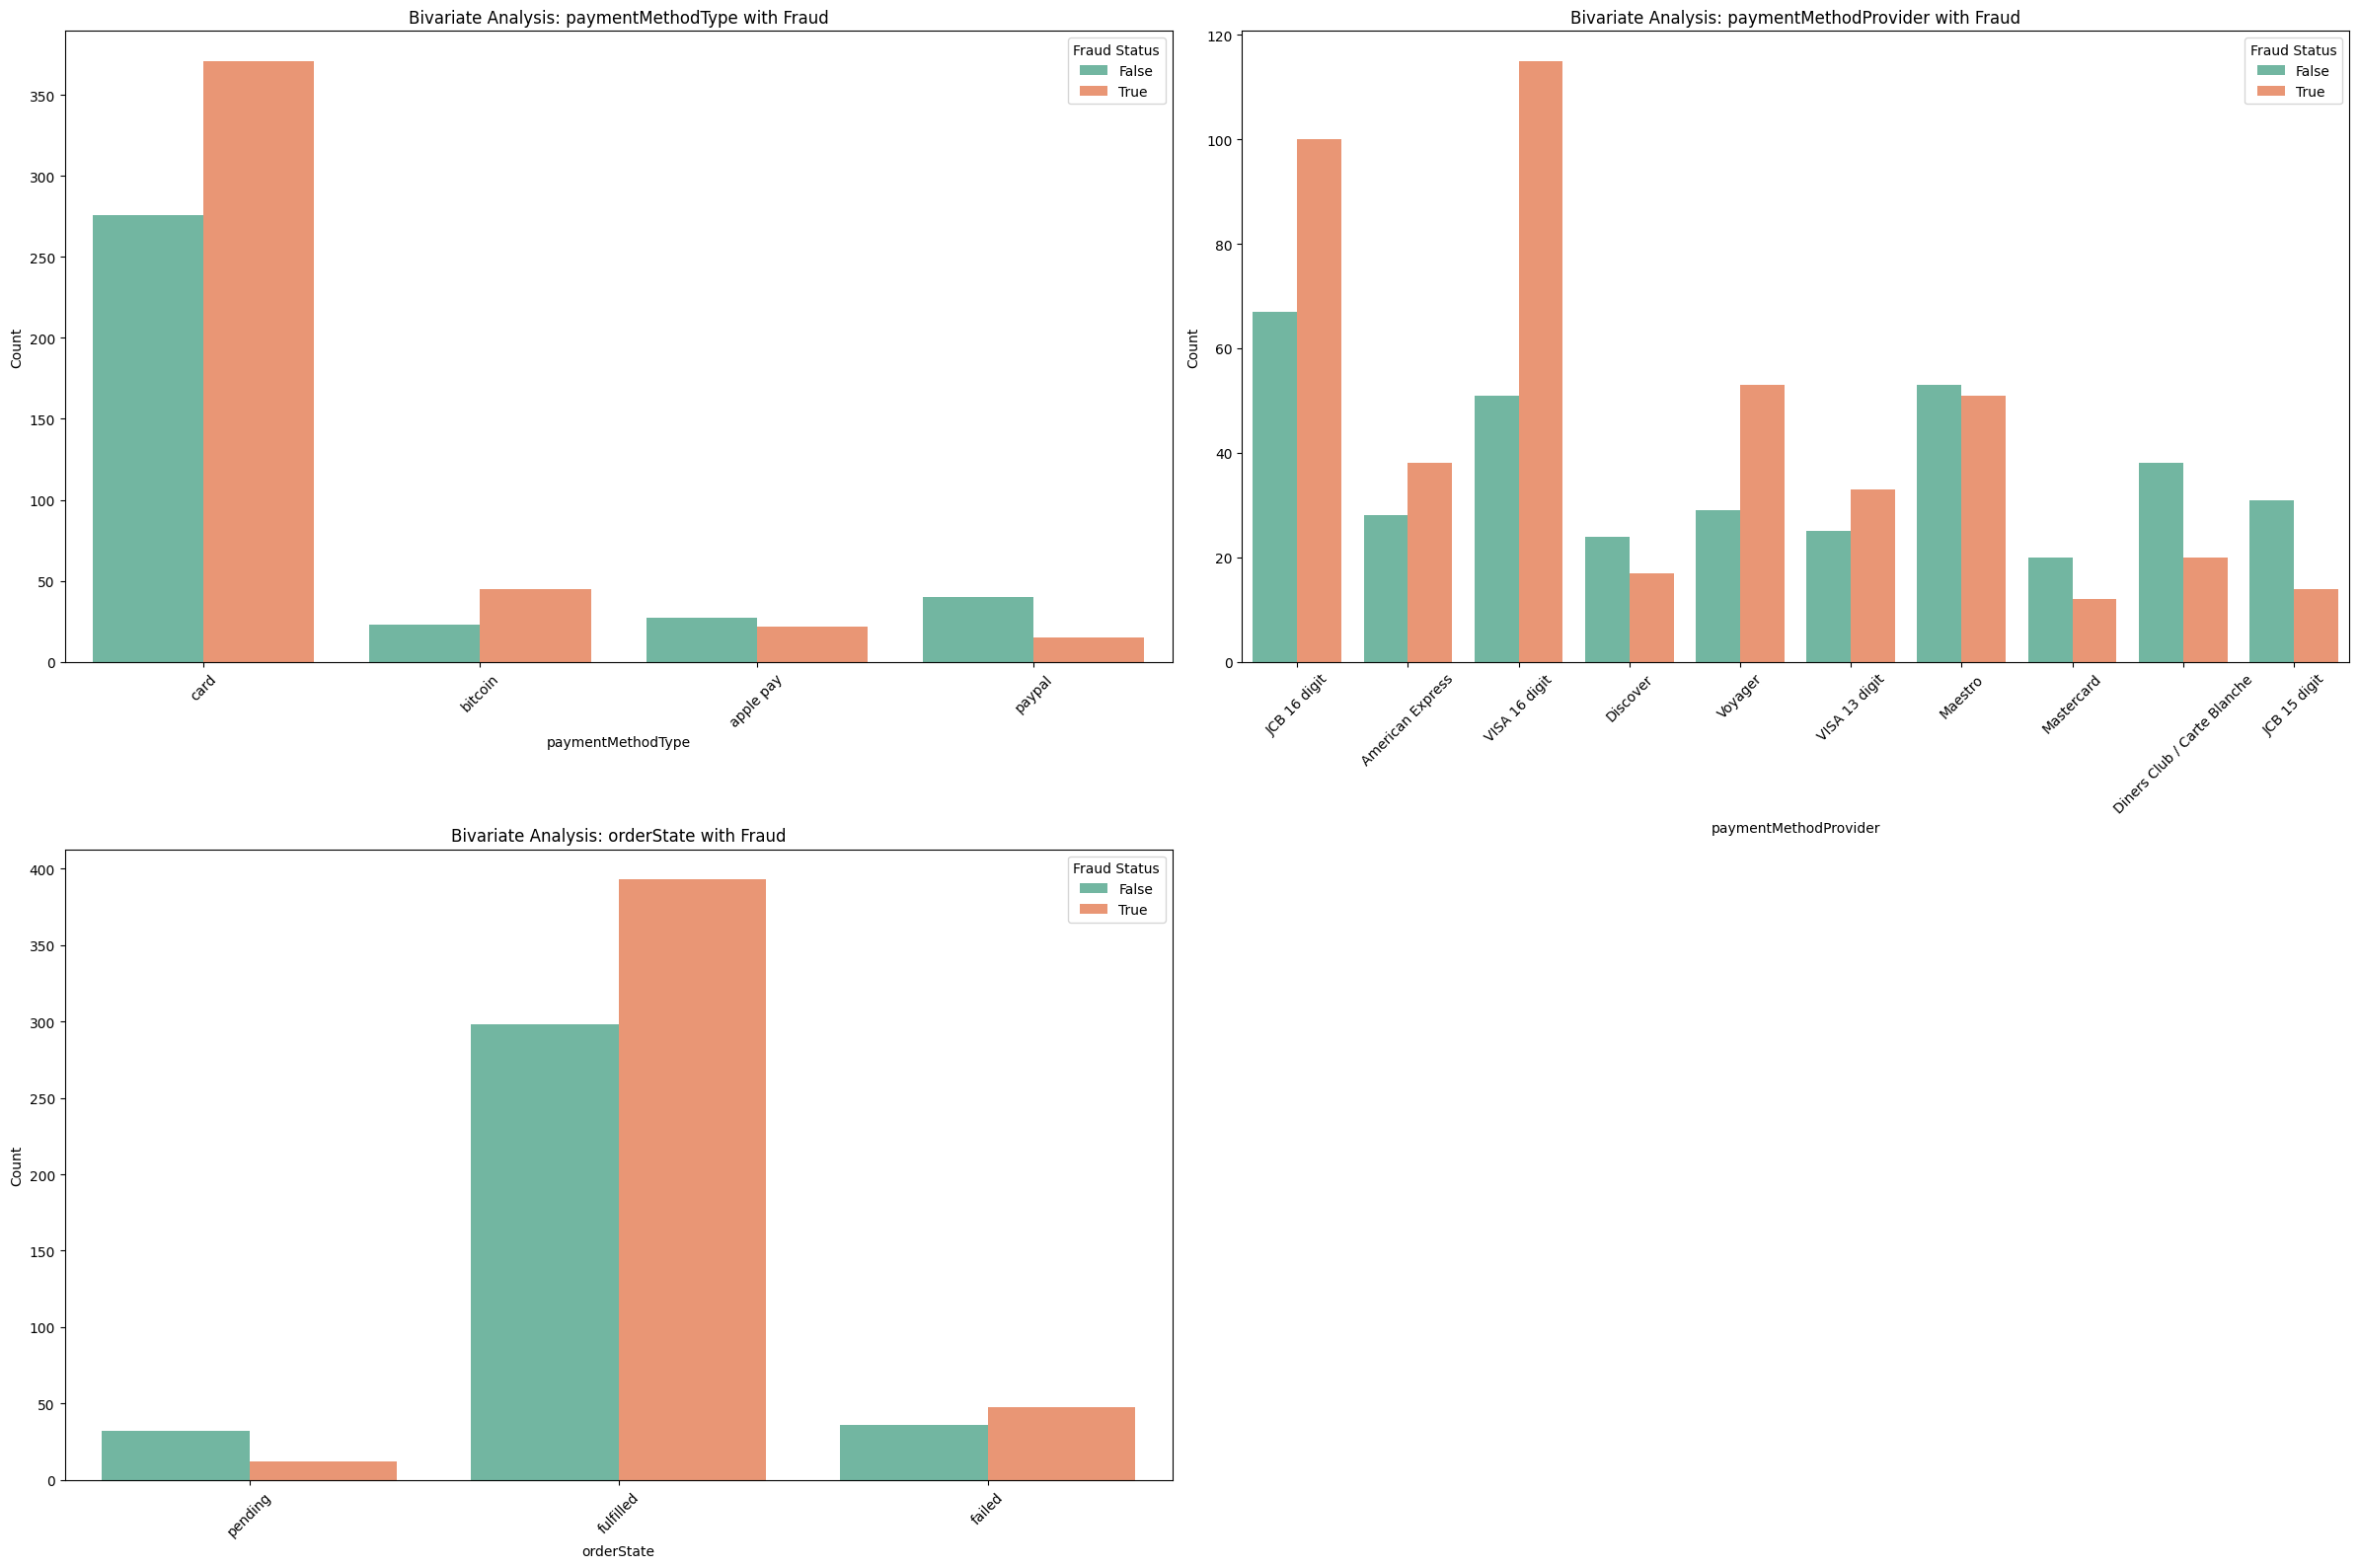

In [ ]:
# Assuming you have a DataFrame 'categorical_df' with the specified categorical columns


categorical_df = categorical_df[['paymentMethodType', 'paymentMethodProvider', 'orderState']]

plt.figure(figsize=(24, 16))

for i, column in enumerate(categorical_df, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, hue=dataset_y, data=categorical_df, palette='Set2')  # dataset_y is target feature
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f'Bivariate Analysis: {column} with Fraud')
    plt.legend(title="Fraud Status")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


######################################################################

checking distrubtion of target feature

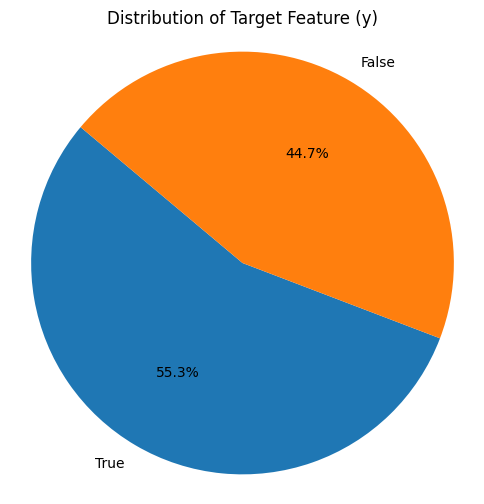

In [ ]:
import matplotlib.pyplot as plt

# Calculate the class distribution
class_distribution = dataset_y.value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Feature (y)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#Feature engineering:

treating outliers

In [ ]:
import pandas as pd
from scipy.stats import iqr

# Assuming 'dataset' is your merged dataframe
numerical_df

# Function to treat outliers using IQR method
def treat_outliers_iqr(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR_value = iqr(dataset[column])

    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value

    dataset[column] = dataset[column].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier treatment for each numerical column
for column in numerical_df:
    treat_outliers_iqr(dataset, column)


In [ ]:
dataset_X
dataset_y

In [ ]:
# Assuming 'dataset' is your merged dataframe
#dataset_X

# Function to treat outliers using IQR method
def treat_outliers_iqr(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR_value = iqr(dataset[column])

    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value

    dataset[column] = dataset[column].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier treatment for each numerical column
for column in numerical_df:
    treat_outliers_iqr(dataset_X, column)

# checking outliers after treating

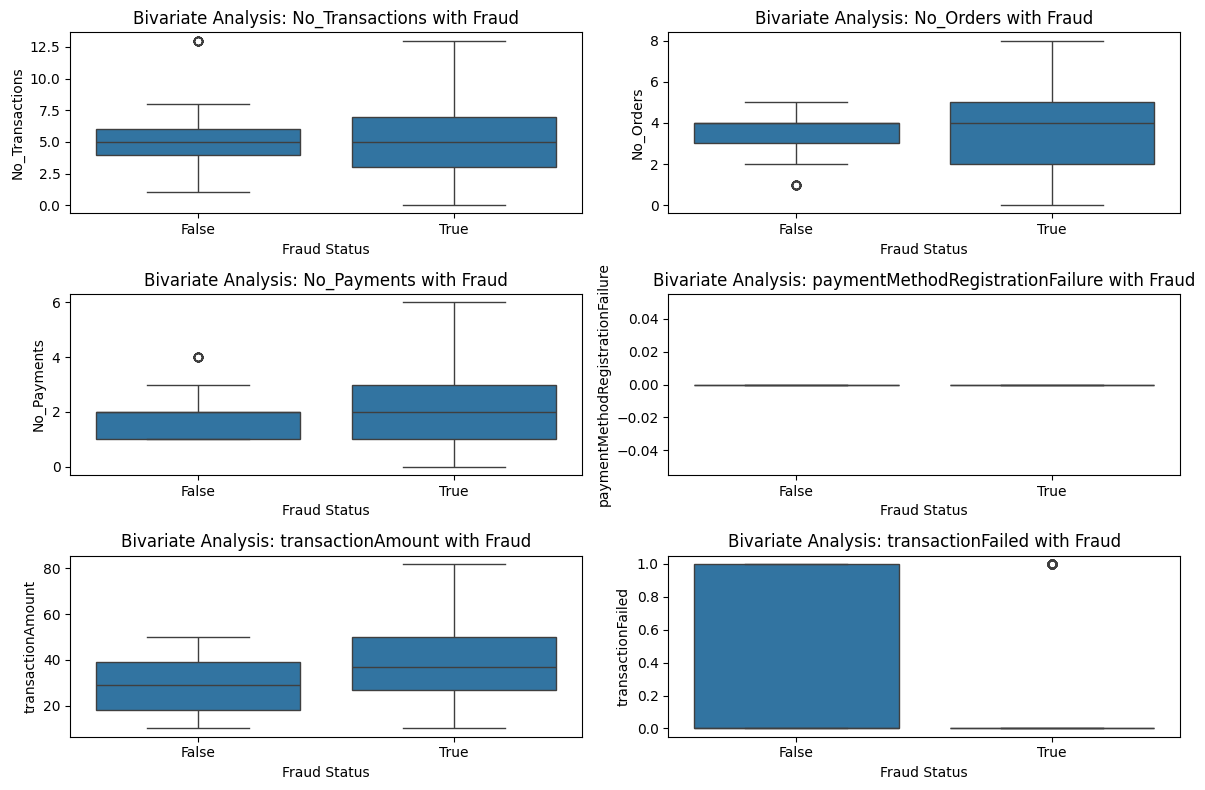

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Assuming you have a DataFrame 'numerical_df' with the specified numerical columns

for i, column in enumerate(numerical_df, 1):
    plt.subplot(3, 2, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x=dataset_y, y=column, data=dataset_X)
    plt.xlabel("Fraud Status")
    plt.ylabel(column)
    plt.title(f'Bivariate Analysis: {column} with Fraud')

plt.tight_layout()
plt.show()

checking if outliers are still present in any columns


In [ ]:
# Function to check for outliers

def check_outliers(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR_value = iqr(dataset[column])

    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value

    # Check if any value is outside the lower or upper bounds
    outliers_present = any((dataset[column] < lower_bound) | (dataset[column] > upper_bound))

    return outliers_present

# Check for outliers in each numerical column
for column in numerical_df:
    outliers_present = check_outliers(dataset_X, column)

    if outliers_present:
        print(f"Outliers are present in column '{column}'.")
    else:
        print(f"No outliers detected in column '{column}'.")


No outliers detected in column 'No_Transactions'.
No outliers detected in column 'No_Orders'.
No outliers detected in column 'No_Payments'.
No outliers detected in column 'paymentMethodRegistrationFailure'.
No outliers detected in column 'transactionAmount'.
No outliers detected in column 'transactionFailed'.


checking outliers using box plot

In [ ]:
dataset_X.dtypes

customerEmail                       object
customerPhone                       object
customerDevice                      object
customerIPAddress                   object
customerBillingAddress              object
No_Transactions                      int64
No_Orders                            int64
No_Payments                          int64
transactionId                       object
orderId                             object
paymentMethodId                     object
paymentMethodRegistrationFailure     int64
transactionAmount                    int64
transactionFailed                    int64
dtype: object

In [ ]:
categorical_df

,paymentMethodType,paymentMethodProvider,orderState
0,card,JCB 16 digit,pending
1,card,JCB 16 digit,fulfilled
2,bitcoin,American Express,fulfilled
3,bitcoin,American Express,fulfilled
4,bitcoin,VISA 16 digit,fulfilled
...,...,...,...
814,card,VISA 13 digit,fulfilled
815,card,VISA 13 digit,fulfilled
816,paypal,JCB 15 digit,fulfilled
817,paypal,JCB 15 digit,fulfilled


observation: categorical encoding
1. fraud (target feature)
2. paymentMethodType
3. paymentMethodProvider
4. orderState


In [ ]:
# Extracting categorical columns
categorical_cols = dataset_X[['paymentMethodType', 'paymentMethodProvider', 'orderState']]
categorical_cols

,paymentMethodType,paymentMethodProvider,orderState
0,card,JCB 16 digit,pending
1,card,JCB 16 digit,fulfilled
2,bitcoin,American Express,fulfilled
3,bitcoin,American Express,fulfilled
4,bitcoin,VISA 16 digit,fulfilled
...,...,...,...
814,card,VISA 13 digit,fulfilled
815,card,VISA 13 digit,fulfilled
816,paypal,JCB 15 digit,fulfilled
817,paypal,JCB 15 digit,fulfilled


# Treating categorical column using onehot encoding , label encoding (for target feature)

OneHOt encoding

In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Extracting categorical columns
categorical_cols = ['paymentMethodType', 'paymentMethodProvider', 'orderState']

# Creating an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fitting and transforming the categorical columns
encoded_cols = encoder.fit_transform(dataset_X[categorical_cols])

# Creating new column names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(categorical_cols)

# Creating a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_cols.astype(int), columns=encoded_column_names)

# Dropping the original categorical columns from X
dataset_X.drop(columns=categorical_cols, inplace=True)

# Concatenating the original DataFrame (excluding categorical columns) with the encoded DataFrame
X = pd.concat([dataset_X, encoded_df], axis=1)


label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the target feature
y = label_encoder.fit_transform(dataset_y)

# Print the mapping of original classes to encoded values
print("Mapping of original classes to encoded values:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label}: {i}")

# You can use the encoded target feature (y_encoded) in your further analysis or modeling.


Mapping of original classes to encoded values:
False: 0
True: 1


In [ ]:
# as we are getting values of y in array so converting it to dataframe
# Assuming 'y' is your NumPy array

y_dataframe = pd.DataFrame(y, columns=['Target'])


checking target feature

In [ ]:
y_dataframe

,Target
0,0
1,0
2,1
3,1
4,1
...,...
814,0
815,0
816,0
817,0


checking value of target feature after encoding

In [ ]:
y_dataframe.value_counts()

Target
1         453
0         366
dtype: int64

########################################################################

In [ ]:
# checking x after encoding
X.head(10)

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,transactionId,orderId,...,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_fulfilled,orderState_pending
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,a9lcj51r,vjbdvd,...,0,0,1,0,0,0,0,0,0,1
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,y4wcv03i,yp6x27,...,0,0,1,0,0,0,0,0,1,0
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,5mi94sfw,nlghpa,...,0,0,0,0,0,0,0,0,1,0
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,br8ba1nu,uw0eeb,...,0,0,0,0,0,0,0,0,1,0
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,a33145ss,bn44oh,...,0,0,0,0,0,0,1,0,1,0
5,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,q3lyvbza,yk34y2,...,0,0,1,0,0,0,0,0,0,0
6,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,3alf9irw,28v6b0,...,0,0,1,0,0,0,0,0,1,0
7,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,69w9wymx,28v6b0,...,0,0,1,0,0,0,0,0,1,0
8,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,pegqc4ud,itnk8y,...,1,0,0,0,0,0,0,0,1,0
9,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,uo3slwh7,itnk8y,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X.dtypes

customerEmail                                        object
customerPhone                                        object
customerDevice                                       object
customerIPAddress                                    object
customerBillingAddress                               object
No_Transactions                                       int64
No_Orders                                             int64
No_Payments                                           int64
transactionId                                        object
orderId                                              object
paymentMethodId                                      object
paymentMethodRegistrationFailure                      int64
transactionAmount                                     int64
transactionFailed                                     int64
paymentMethodType_bitcoin                             int64
paymentMethodType_card                                int64
paymentMethodType_paypal                

# below are catogerical variable that i am planing to drop

In [ ]:
# this is the list of column that i am droping

['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress',
       'transactionId', 'orderId', 'paymentMethodId']

['customerEmail',
 'customerPhone',
 'customerDevice',
 'customerIPAddress',
 'customerBillingAddress',
 'transactionId',
 'orderId',
 'paymentMethodId']

In [ ]:
columns_to_drop = ['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress', 'transactionId', 'orderId', 'paymentMethodId']

# Drop the specified columns
X = X.drop(columns=columns_to_drop, axis=1)


In [ ]:
#checking data type after droping

X.dtypes

No_Transactions                                      int64
No_Orders                                            int64
No_Payments                                          int64
paymentMethodRegistrationFailure                     int64
transactionAmount                                    int64
transactionFailed                                    int64
paymentMethodType_bitcoin                            int64
paymentMethodType_card                               int64
paymentMethodType_paypal                             int64
paymentMethodProvider_Diners Club / Carte Blanche    int64
paymentMethodProvider_Discover                       int64
paymentMethodProvider_JCB 15 digit                   int64
paymentMethodProvider_JCB 16 digit                   int64
paymentMethodProvider_Maestro                        int64
paymentMethodProvider_Mastercard                     int64
paymentMethodProvider_VISA 13 digit                  int64
paymentMethodProvider_VISA 16 digit                  int

In [ ]:
X.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed', 'paymentMethodType_bitcoin',
       'paymentMethodType_card', 'paymentMethodType_paypal',
       'paymentMethodProvider_Diners Club / Carte Blanche',
       'paymentMethodProvider_Discover', 'paymentMethodProvider_JCB 15 digit',
       'paymentMethodProvider_JCB 16 digit', 'paymentMethodProvider_Maestro',
       'paymentMethodProvider_Mastercard',
       'paymentMethodProvider_VISA 13 digit',
       'paymentMethodProvider_VISA 16 digit', 'paymentMethodProvider_Voyager',
       'orderState_fulfilled', 'orderState_pending'],
      dtype='object')

In [ ]:
# Feature selection
skb = SelectKBest(score_func=chi2, k=10)
X_selected = skb.fit_transform(X, y)
print(X_selected)

[[2 2 1 ... 0 0 1]
 [2 2 1 ... 0 0 0]
 [3 3 7 ... 0 0 0]
 ...
 [7 5 4 ... 0 0 0]
 [7 5 4 ... 0 0 0]
 [7 5 4 ... 0 0 0]]


In [ ]:
selected_feature_indices = skb.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print(selected_feature_names)


Index(['No_Transactions', 'No_Orders', 'No_Payments', 'transactionAmount',
       'paymentMethodType_paypal',
       'paymentMethodProvider_Diners Club / Carte Blanche',
       'paymentMethodProvider_JCB 15 digit',
       'paymentMethodProvider_Mastercard',
       'paymentMethodProvider_VISA 16 digit', 'orderState_pending'],
      dtype='object')


In [ ]:
X_selected = X[['No_Transactions', 'No_Orders', 'No_Payments', 'transactionAmount',
       'paymentMethodType_paypal',
       'paymentMethodProvider_Diners Club / Carte Blanche',
       'paymentMethodProvider_JCB 15 digit',
       'paymentMethodProvider_Mastercard',
       'paymentMethodProvider_VISA 16 digit', 'orderState_pending']]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_dataframe, test_size=0.3, random_state=42)


#feature scaling

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# sampling

note : sampling is done onlt on training data (x_train, y_train) not on test data

In [ ]:
# Define the resampling strategy

#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#undersampler = RandomUnderSampler(sampling_strategy='majority')  # For undersampling
oversampler = RandomOverSampler()  # For oversampling

# Resample the training data
#X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)  # For undersampling

X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)  # For oversampling

In [ ]:
#checking how many column drop after sampling
y_train.shape[0] - y_resampled.shape[0]

-63

In [ ]:
y_resampled.value_counts()

Target
0         318
1         318
dtype: int64

#model building

In [ ]:

from sklearn.linear_model import LogisticRegression


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=0)

#fit on x_resampled and y_resampled
log_reg.fit(X_resampled, y_resampled)

####################################################################

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=0)

#Hyperparameter tuning

In [ ]:
#Hyperparameter Tuning Use GridSearchCV to find the best hyperparameters for your model.

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_
print(best_params)

# Hyperparameter tuning for Random Forest Classifier
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [2, 3, 4]}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'penalty': 'l2'}
{'max_depth': 4, 'n_estimators': 200}


In [ ]:
# predict for logistic reg:
y_pred_log_reg = log_reg.predict(X_test)

#predict for random forest:
y_pred_rfc = rfc.predict(X_test)


In [ ]:
#Step 11: Evaluate the model Evaluate the performance of the model by comparing the predicted values with the actual values.
from sklearn.metrics import confusion_matrix, accuracy_score

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

print('Logistic Regression Accuracy: ' + str(accuracy_score(y_test, y_pred_log_reg)))
print('Random Forest Classifier Accuracy: ' + str(accuracy_score(y_test, y_pred_rfc)))

Logistic Regression Accuracy: 0.7398373983739838
Random Forest Classifier Accuracy: 0.8536585365853658


In [ ]:
cm_log_reg

array([[ 78,  33],
       [ 31, 104]])

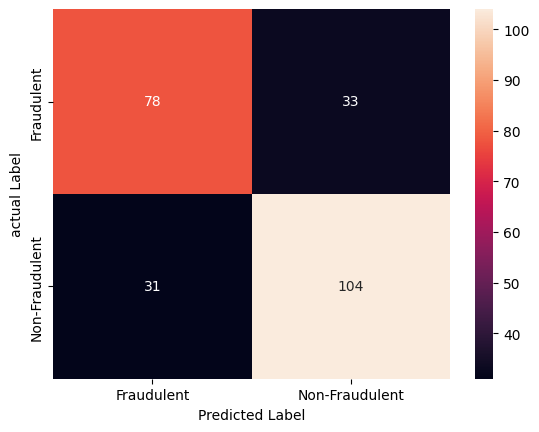

In [ ]:
# Import the seaborn library
import seaborn as sns

# Define the confusion matrix array
confusion_matrix_log_reg = cm_log_reg

# Define the labels for the classes
classes = ["Fraudulent", "Non-Fraudulent"]

# Plot the heat map with confusion matrix notation and custom labels
sns.heatmap(confusion_matrix_log_reg, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('actual Label')
#plt.title('Confusion Matrix')
plt.show()


For example,


TP would be 78,
FN would be 33,
FP would be 31,
TN would be 104.




This means that out of 246 instances, the model correctly predicted 78 fraudulent and 104 non-fraudulent instances, and incorrectly predicted 33 fraudulent as non-fraudulent and 31 non-fraudulent as fraudulent.

In [ ]:
cm_rfc

array([[ 91,  20],
       [ 16, 119]])

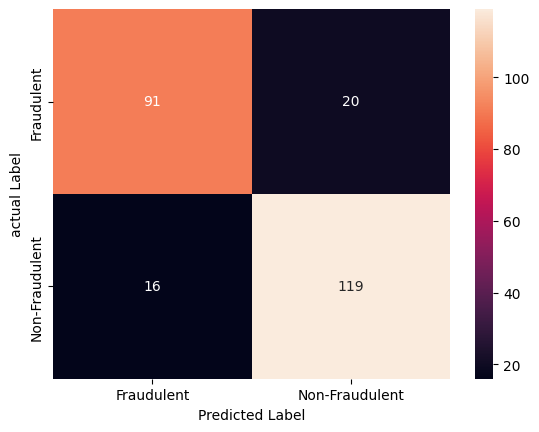

In [ ]:
# Import the seaborn library
import seaborn as sns

# Define the confusion matrix array
confusion_matrix_rfc = cm_rfc

# Define the labels for the classes
classes = ["Fraudulent", "Non-Fraudulent"]

# Plot the heat map with confusion matrix notation and custom labels
sns.heatmap(confusion_matrix_rfc, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('actual Label')
#plt.title('Confusion Matrix')
plt.show()

For example: TP would be 93, FN would be 18, FP would be 14, and TN would be 121. This means that out of 246 instances, the model correctly predicted 93 fraudulent and 121 non-fraudulent instances, and incorrectly predicted 18 fraudulent as non-fraudulent and 14 non-fraudulent as fraudulent.

In [ ]:
# for logistic regression :
print("presission score::",precision_score(y_test,y_pred_log_reg))

print("recall score::", recall_score(y_test,y_pred_log_reg))

presission score:: 0.7591240875912408
recall score:: 0.7703703703703704


In [ ]:
# precision score and recall for random forest
print("presission score::",precision_score(y_test,y_pred_rfc))

print("recall score::", recall_score(y_test,y_pred_rfc))

presission score:: 0.8561151079136691
recall score:: 0.8814814814814815


In [ ]:
final_data = pd.DataFrame({'Models':['Log Reg','Random Forest'],'Accuracy':[accuracy_score(y_test, y_pred_log_reg),
                                                                 accuracy_score(y_test, y_pred_rfc)], 'presission score':[precision_score(y_test,y_pred_log_reg),precision_score(y_test,y_pred_rfc)], "recall_score":[recall_score(y_test,y_pred_log_reg),recall_score(y_test,y_pred_rfc)]})

In [ ]:
final_data

,Models,Accuracy,presission score,recall_score
0,Log Reg,0.739837,0.759124,0.770370
1,Random Forest,0.853659,0.856115,0.881481
